# Anchor Explanations for ImageNet

[Alibi Reference Notebook](https://github.com/SeldonIO/alibi/blob/524d786c81735ed90da2d2c68851c1145fa1b595/examples/anchor_image_imagenet.ipynb)

Denis Rothman 2020, MIT License. Modification for educational purposes. A cell to install Alibi.  A form was added to choose an ImageNet category from a list of image categories Alibi processed. The titles of the cells were simplified.

In [ ]:
#@title Install Alibi
try:
  import alibi
except:
  !pip install alibi

     |████████████████████████████████| 225kB 7.2MB/s 
     |████████████████████████████████| 110.5MB 59kB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 276kB 40.8MB/s 
     |████████████████████████████████| 28.0MB 82kB/s 
     |████████████████████████████████| 3.8MB 41.3MB/s 
     |████████████████████████████████| 512kB 41.9MB/s 
     |████████████████████████████████| 204kB 40.8MB/s 
     |████████████████████████████████| 921kB 39.0MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394117 sha256=fb441956f042df4c8750a4561d9c5f3d4327d0aa7724c9fc363605a50c75764d
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052144 sha256=c42b4fd8e7e008b14b4f6e9f84b66f7d0657840b41588a1c911005cbbc9c1ee6
  Stored in directory: /root/.cache/pip/wheels/2a/2b/

In [ ]:
#@title Importing modules
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)  # suppress deprecation messages
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from alibi.datasets import fetch_imagenet
from alibi.explainers import AnchorImage

In [ ]:
#@title Load InceptionV3 model pre-trained on ImageNet
model = InceptionV3(weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
96116736/96112376 [==============================] - 4s 0us/step


In [ ]:
#@title Download image from ImageNet
category = 'Persian cat' #@param ["Persian cat","volcano","strawberry","centipede","jellyfish"]
image_shape = (299, 299, 3)
data, labels = fetch_imagenet(category, nb_images=25, target_size=image_shape[:2], seed=2, return_X_y=True)
print('Images shape: {}'.format(data.shape))

Images shape: (25, 299, 299, 3)


In [ ]:
#@title Process image and make predictions
images = preprocess_input(data)
preds = model.predict(images)
label = decode_predictions(preds, top=3)
print(label[0])

40960/35363 [==================================] - 0s 0us/step
[('n02123394', 'Persian_cat', 0.9025977), ('n03207941', 'dishwasher', 0.0036707905), ('n03832673', 'notebook', 0.002471875)]


In [ ]:
#@title Define prediction model
predict_fn = lambda x: model.predict(x)

In [ ]:
#@title Initialize anchor image explainer
segmentation_fn = 'slic'
kwargs = {'n_segments': 15, 'compactness': 20, 'sigma': .5}
explainer = AnchorImage(predict_fn, image_shape, segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs, images_background=None)

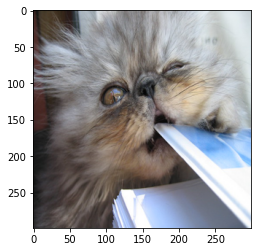

In [ ]:
#@title Display mask with superpixels that constitute the anchor
i = 0
plt.imshow(data[i]);

In [ ]:
#@title Anchor explanation
image = images[i]
np.random.seed(0)
explanation = explainer.explain(image, threshold=.95, p_sample=.5, tau=0.25)

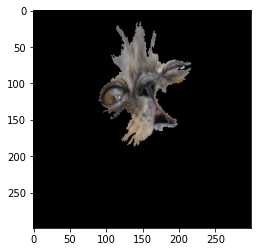

In [ ]:
#@title Superpixels in the anchor
plt.imshow(explanation.anchor);

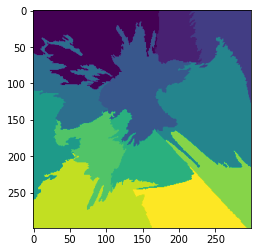

In [ ]:
#@title All superpixels
plt.imshow(explanation.segments);